# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [1]:
# Fijamos el parámetro RANDOM_STATE
RANDOM_STATE = 333

# Parte 3: Regresión

__Número de grupo: 15__

__Nombres de los estudiantes:__
- Daniela Alejanda Córdova
- David Bugoi
- Erik Karlgren Domercq

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

### Descripción del conjunto de datos

In [2]:
import pandas as pd

df = pd.read_csv (r'airbnb.csv')
df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
accommodates,14998.0,2.880317,1.298492,1.000000,2.000000,2.000000,4.000000,17.000000
bathrooms,14998.0,1.116215,0.343442,0.000000,1.000000,1.000000,1.000000,8.000000
bedrooms,14998.0,1.390919,0.839649,0.000000,1.000000,1.000000,2.000000,10.000000
guests_included,14998.0,1.499333,0.940643,1.000000,1.000000,1.000000,2.000000,16.000000
host_listings_count,14998.0,3.372316,11.203593,0.000000,1.000000,1.000000,1.000000,106.000000
latitude,14998.0,52.365312,0.015765,52.290308,52.355582,52.364960,52.374805,52.426224
longitude,14998.0,4.889033,0.035010,4.753513,4.864839,4.886370,4.907953,5.027689
minimum_nights,14998.0,2.885051,7.252271,1.000000,2.000000,2.000000,3.000000,523.000000
number_of_reviews,14998.0,17.797440,34.766613,0.000000,2.000000,7.000000,18.000000,496.000000
distance_centre,14998.0,2.998582,1.610995,0.115801,1.948924,2.841338,3.577086,11.842162


Tenemos los datos de unos 14.998 apartamentos disponibles para alquiler en Amsterdam, y de cada uno tenemos 15 características que queremos usar para predecir el precio de cualquier apartamento de la ciudad.

### Significado de cada variable
Para deducir el significado de algunas de estas variables nos ha servido consultar foros y páginas oficiales de Airbnb.
- **Accomodates:** Número de huéspedes que caben o pueden quedarse en el apartamento.
- **Bathrooms:** Número de cuartos de baño del apartamento.
- **Bedrooms:** Número de dormitorios.
- **Guests included:** Número de invitados que pueden traer los huéspedes.
- **Host listings count:** Puede que el número de anfitriones
- **Latitude & Longitude:** Coordenadas del apartamento en latitud y longitud respectivamente.
- **Minimum nights:** Mínimo número de noches de una estancia.
- **Number of reviews:** Número de valoraciones del apartamento.
- **Distance centre:** Distancia al centro de la ciudad (probablemente en kilómetros).
- **Instant bookable:** 1 si se puede reservar el apartamento inmediatamente, 0 en caso contrario.
- **Entire home:** 1 si se alquila la casa entera, 0 en caso contrario.
- **Private room:** 1 si se tiene una habitación privada, 0 en caso contrario.
- **Shared room:** 1 si la habitación es compartida, 0 en caso contrario.
- **Price:** Precio del alquiler en € (posiblemente sea el precio por noche).

### Estudio de la distribución de precios
Como queremos predecir los precios, estudiemos su distribución:

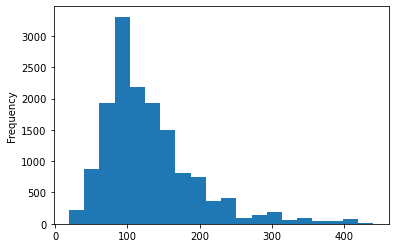

In [4]:
#df.price.hist()
df['price'].plot(kind="hist", bins=20)

Observamos una distribución asimétrica a la derecha, ya que muchos apartamentos cuestan alrededor de 100€ la noche pero hay más apartamentos más caros aún que apartamentos más baratos.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [5]:
# Calculamos correlaciones 2 a 2
correl = df.corr(method='pearson')
# Solo correlaciones con price superiores o iguales a 0.2
best_correls = correl['price'][abs(correl['price']) >= 0.2]
# Nos quedamos con las columnas con una correlación mínima de 0.2
final_df = df.loc[:, best_correls.index]
final_df

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

---

El MLP puede tratar con variables sin normalizar o sin estandarizar.
Sin embargo, la normalización o estandarización de las variables disminuye el tiempo de entrenamiento y evita los “mínimos locales” en la optimización del error.
Cuando trabajamos con redes neuronales suele ser una buena idea reescalar los datos para facilitar que el entrenamiento converja más rápidamente.

In [6]:
import statistics as stats

# Para obtener media, mediana y moda
i = 0
while i < len(final_df.columns):
    print(final_df.columns.values[i])
    print("Media: ", stats.mean(final_df.iloc[:,i]))
    print("Mediana: ", stats.median(final_df.iloc[:,i]))
    print("Moda: ", stats.mode(final_df.iloc[:,i]))
    print()
    i=i+1

accommodates
Media:  2.880317375650087
Mediana:  2.0
Moda:  2

bathrooms
Media:  1.1162154953993866
Mediana:  1.0
Moda:  1.0

bedrooms
Media:  1.3909187891718895
Mediana:  1.0
Moda:  1.0

guests_included
Media:  1.499333244432591
Mediana:  1.0
Moda:  1

distance_centre
Media:  2.998581930967817
Mediana:  2.8413376133151393
Moda:  3.2794828904546702

entire_home
Media:  0.7771702893719162
Mediana:  1.0
Moda:  1

private_room
Media:  0.21856247499666623
Mediana:  0.0
Moda:  0

price
Media:  130.05027336978264
Mediana:  115.0
Moda:  100.0



Como se puede ver, los valores no siguen una distribución normal en muchos casos ya que la media, mediana y moda no se parecen mucho. Por tanto debemos reescalar los datos y no estandarizarlos.

Transformamos las variables de entrada:

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una copia de los datos originales para no modificarlos
df_sin_precio = final_df.copy().drop(['price'], axis=1)

# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
scaler = MinMaxScaler()  # lo usamos porque los puntos no siguen una distribución normal
scaler.fit(df_sin_precio)
scaled_data = scaler.transform(df_sin_precio)  # cambia los datos a un sistema de coordendas scaled

scaled_data

array([[0.1875    , 0.25      , 0.2       , ..., 0.26979228, 1.        ,
        0.        ],
       [0.1875    , 0.125     , 0.2       , ..., 0.49768568, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.2119373 , 1.        ,
        0.        ],
       ...,
       [0.0625    , 0.125     , 0.1       , ..., 0.12830863, 1.        ,
        0.        ],
       [0.125     , 0.125     , 0.1       , ..., 0.14173871, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.21353482, 1.        ,
        0.        ]])

Y transformamos la variable de salida.

In [8]:
# Usamos una copia de los datos originales para no modificarlos
df_price = final_df.copy().price.to_numpy().reshape(-1,1)

# MinMaxScaler escala los datos al intervalo [0-1] sin modificar su distribución
scaler_precio = MinMaxScaler()  # lo uso porque los puntos no siguen distribucion normal
scaler_precio.fit(df_price)
precios_scaled = scaler_precio.transform(df_price)  # cambia los datos a un sistema de coordendas escaladas

precios_scaled

array([[0.33491686],
       [0.23990499],
       [0.19002375],
       ...,
       [0.23990499],
       [0.18052257],
       [0.23990499]])

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Entrenar y validar distintas configuraciones
# Definido aquí porque lo necesitaremos también para dibujar la curva de aprendizaje
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]

# Definimos una función para entrenar un MLP dados unos datos, el target y el tamaño de las capas ocultas
def trainMLP(scaled_data, scaled_target, hidden_layer_sizes_tuple):

    cv_scores_mean = []
    cv_scores_std = []
    
    for regul_param in regul_param_range:
        # Aumentamos el parámetro max_iter hasta que converja
        mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes_tuple, 
                           activation='relu', 
                           solver='adam', 
                           alpha=regul_param, 
                           batch_size=100, 
                           learning_rate='constant', 
                           learning_rate_init=0.001, 
                           max_iter=500, 
                           random_state=RANDOM_STATE)

        # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
        scores = cross_val_score(mlp, scaled_data, scaled_target.ravel(), 
                                 cv=5, scoring='neg_mean_squared_error')

        cv_scores_mean.append(scores.mean())
        cv_scores_std.append(scores.std())

    return cv_scores_mean, cv_scores_std

Entrenamos los 2 modelos: uno de una capa de 200 neuronas (modelo 1), y otro de 2 capas de 10 neuronas cada una (modelo 2).

In [11]:
cv_scores_mean1, cv_scores_std1 = trainMLP(scaled_data, precios_scaled, (200,))
cv_scores_mean2, cv_scores_std2 = trainMLP(scaled_data, precios_scaled, (100,100,))

Definimos una función para dibujar los resultados obtenidos y poder compararlos:

In [32]:
def plot_compare_MLP_data(cv_scores_means, cv_scores_stds, labels):
    colors = ['r','g','b','c','y','k','m',]
    
    # Suponemos que cv_scores_means y cv_scores_stds tienen la misma longitud
    num_models = len(cv_scores_means)
    
    for i in range(num_models):
        # Dibujamos la línea de la exactitud media en las partes de test
        plt.plot(np.log10(regul_param_range), cv_scores_means[i], 
                 color=colors[i%len(colors)], label="Test " + labels[i])

        # Dibujamos la banda de la desviación típica
        lower_limit = np.array(cv_scores_means[i]) - np.array(cv_scores_stds[i])
        upper_limit = np.array(cv_scores_means[i]) + np.array(cv_scores_stds[i])
        
        plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, 
                         color=colors[i%len(colors)], alpha=0.2)

    # Creamos el gráfico
    plt.title("Curva de aprendizaje")
    plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

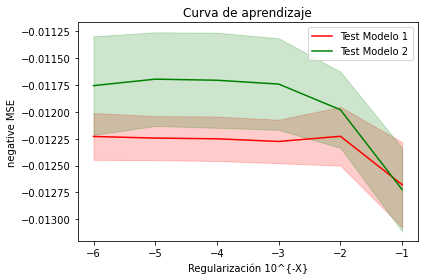

In [33]:
plot_compare_MLP_data([cv_scores_mean1, cv_scores_mean2], 
                      [cv_scores_std1, cv_scores_std2],
                      ["Modelo 1", "Modelo 2"])

Lo que nos interesa es minimizar el valor absoluto del MSE (es decir, que se acerque a 0) y el de la regularización L2. Por tanto, como vemos que el segundo modelo es el que menor error tiene en la gran mayoría de casos (de hecho, cuanto más pequeña es la regularización más se nota que el modelo 2 domina al modelo 1), concluimos que este debe de ser el mejor de los 2.

La superioridad del modelo 2 se debe a usar 2 capas ocultas de 100 neuronas cada una en vez de una sola capa oculta de 200 neuronas. Tener más capas ocultas permite abstraer más los datos de entrada y añadir "representaciones" de los mismos, lo que se supone que ayuda a encontrar más rápidamente soluciones a partir de los datos, y esto explica que el modelo 2 se comporte mejor.

Queremos el $\alpha$ que minimice el MSE positivo, pero no termina de quedar claro cuál es el mejor valor por el comportamiento estable del MSE en el rango $[10^{-3}, 10^{-5}]$

In [41]:
# Usamos max() porque cv_scores_mean2 tiene valores negativos, así que el máximo de estos es el más cercano a 0
alpha = 10 ** -cv_scores_mean2.index(max(cv_scores_mean2))
alpha

0.0001

Elejimos, por tanto, $\alpha = 10^{-4}$.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [ ]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, scaled_data, precios_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_precio.inverse_transform(predicts_scaled.reshape(-1,1))

In [ ]:
errors = np.abs(df3.price - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df3.price)

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

In [ ]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
adf_sin_precio = plt.axes()
adf_sin_precio.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

In [ ]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df3.price, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df3.price, df3.price, color='k') 

plt.title('Y Vs Y_pred')
plt.show()